In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
class Perceptron:
  def __init__(self, lr=0.01, N=50, state=2):
    self.lr = lr # learning rate
    self.N = N # Number of iterations
    self.state = state # Random state

  def fit(self, X, Y):
    # random values for weights
    rgen = np.random.RandomState(self.state)

    self.W = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) # Initialize weight to random values with the input shape
    self.B = np.float_(0) # Bias
    self.errors = [] # loss array
    
    # Train the model
    for _ in range(self.N):
      err = 0
      for xi, target in zip(X,Y):
        update = self.lr * (target - self.predict(xi)) # Compute the gradient
        self.W += update * xi # Update weights
        self.B += update # Update bias
        err += int(update != 0.0) # log loss
      self.errors.append(err)

    return self

  def net_input(self, X):
    return np.dot(X, self.W) + self.B

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

In [5]:
  s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
  df = pd.read_csv(s, header=None, encoding='utf-8')
  df
  # print(df)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


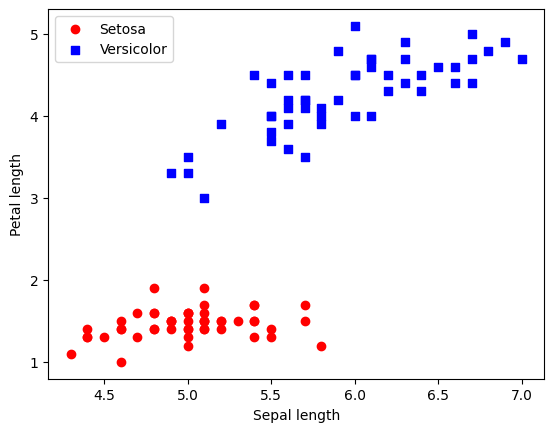

In [6]:
  # Plot dataset
  y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', 0, 1)
  X = df.iloc[0:100, [0,2]].values

  plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
  plt.scatter(X[50:100, 0], X[50:100,1], color='blue', marker='s', label='Versicolor')
  
  plt.xlabel('Sepal length')
  plt.ylabel('Petal length')
  plt.legend(loc='upper left')
  
  plt.show()

Text(0, 0.5, 'Number of updates')

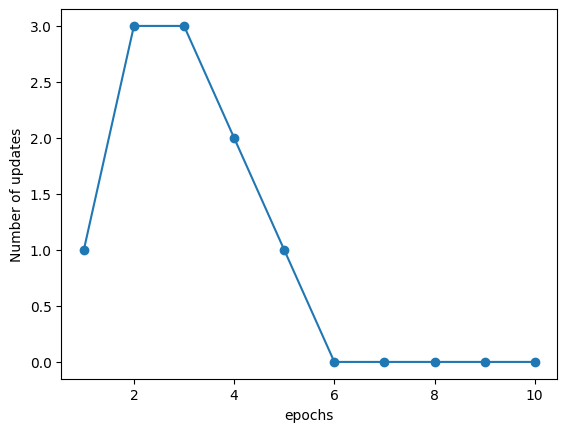

In [7]:
# Test and see the result
ppn = Perceptron(lr=0.1, N=10)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('epochs')

plt.ylabel('Number of updates')



In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Min and max values of sepal length
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Min and max values of petal length
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # Grid for plotting
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label="Setosa" if cl == 0 else "Versicolor",
                    edgecolor='black')

In [21]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [16]:
if X[67].dot(ppn.W) < 0:
  print("Setosa")
else:
  print("Versicolor")


Versicolor
